In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
import scipy.signal as sp
import numpy.linalg as nplin
from gekko import GEKKO

from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.signal import place_poles
from scipy.signal import find_peaks
from scipy.linalg import solve_continuous_are
from scipy import signal



from plotfunc import plot_sets

# 2


In [2]:
def model_mass(x,t):
    u=1

    x1=x[0]
    x2=x[1]

    dx1=x1*np.log(x2)
    dx2=-x2*np.log(x1)+x2*u

    return [dx1,dx2]

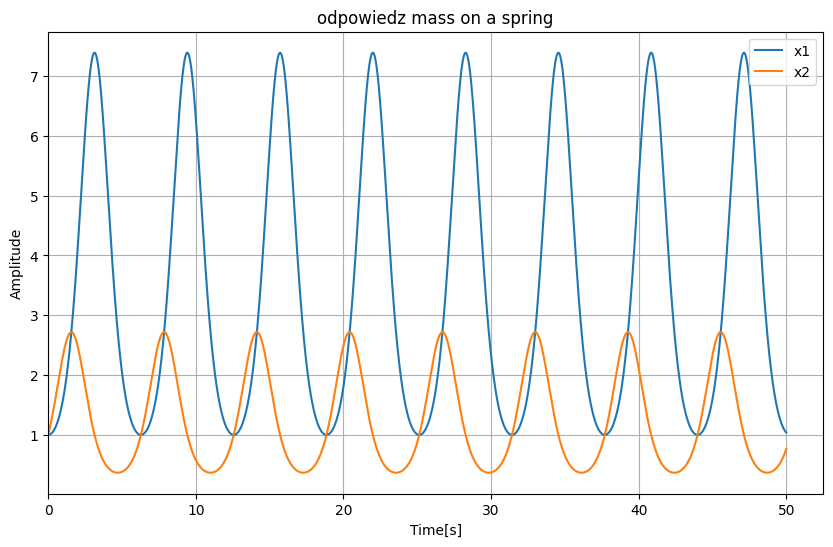

In [3]:
t= np.arange(0,50,0.01)

res_nonlinear=odeint(model_mass,[1,1],t)

plot_sets("odpowiedz mass on a spring",[t,res_nonlinear[:,0],'x1'],[t,res_nonlinear[:,1],'x2'])

In [4]:
def model_mass_new(z,t):
    u=1

    z1=z[0]
    z2=z[1]

    dx1=z2
    dx2=-z1+u

    return [dx1,dx2]

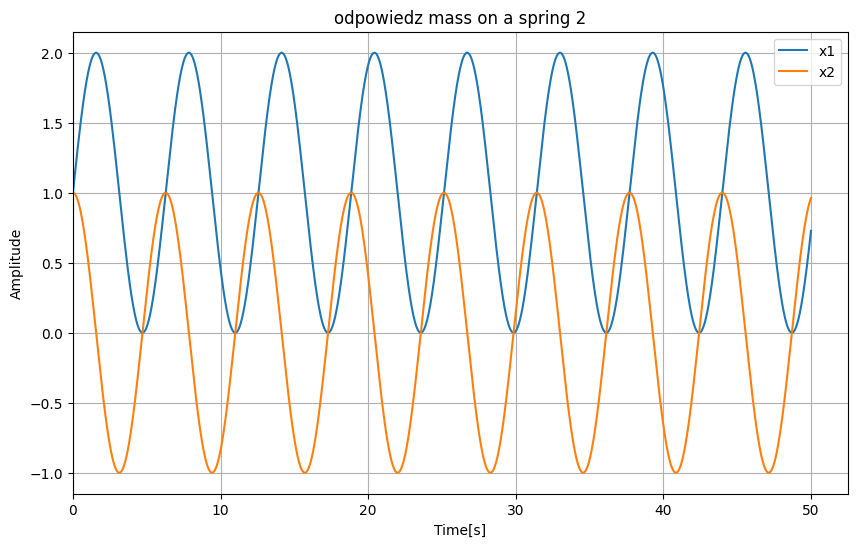

In [5]:
t= np.arange(0,50,0.01)

res_linear=odeint(model_mass_new,[1,1],t)

plot_sets("odpowiedz mass on a spring 2",[t,res_linear[:,0],'x1'],[t,res_linear[:,1],'x2'])

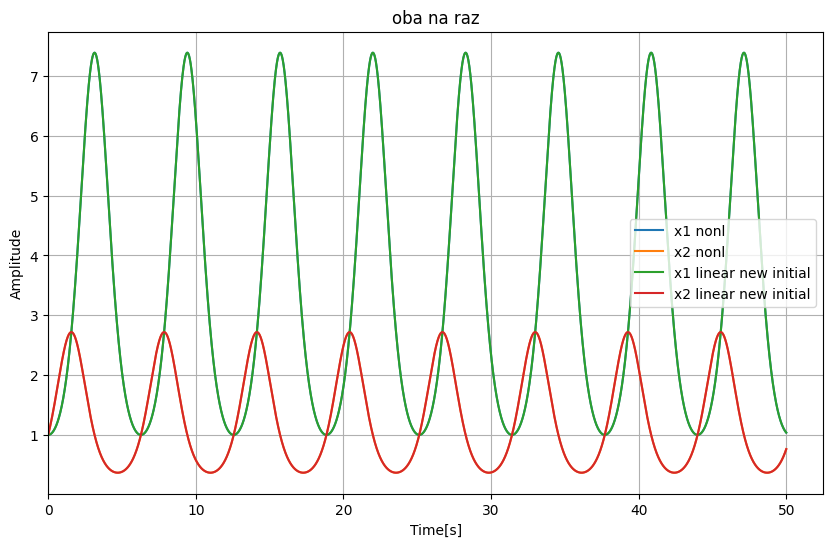

In [8]:
x0=[np.log(1),np.log(1)]

res_linear_new_initial=odeint(model_mass_new,[np.log(1),np.log(1)],t)

nowa_odpowiedz=np.exp(res_linear_new_initial)

plot_sets("oba na raz",[t,res_nonlinear[:,0],'x1 nonl'],[t,res_nonlinear[:,1],"x2 nonl"],[t,nowa_odpowiedz[:,0],"x1 linear new initial"],[t,nowa_odpowiedz[:,1],"x2 linear new initial"])

# 5

In [2]:
#pendulum parameters 

m=9
g=10
l=1
J=1
d=0.5

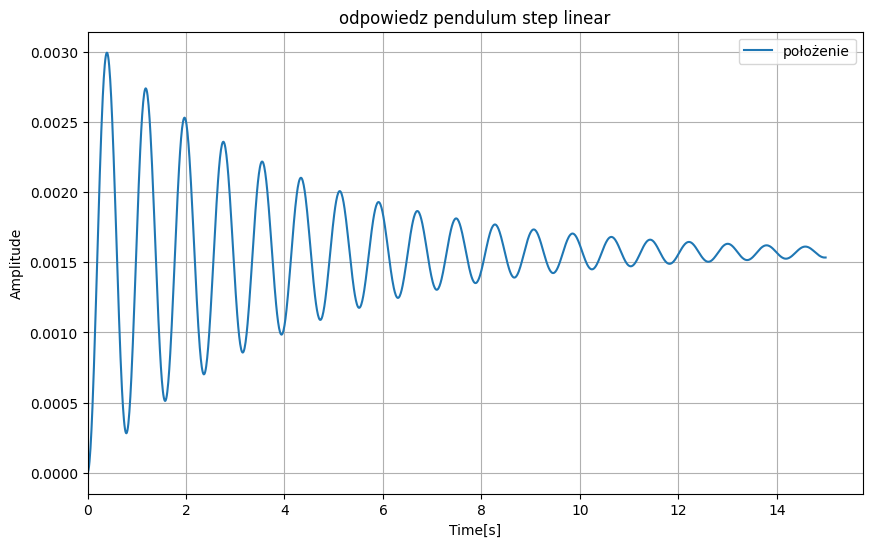

In [49]:
#5.1
#linear pendulum model 

A=np.array([[0,1],
            [-m*g*l/J*np.sqrt(2)/2,-d/J]])
B=np.array([[0],[1/J]])
C=[0,1]

pendulum_model_linear=sp.StateSpace(A,B,C,0)

t=np.arange(0,15,0.01)

u0=np.full(len(t),1)

u=np.zeros((len(t),5))
i=0

for el in [0,0.1,20,45*np.sqrt(2),70]:
    u[:,i]=np.full(len(t),el)
    i+=1

#print(u[:,1])

t_res,_,state0=sp.lsim(pendulum_model_linear,u[:,0],T=t)
t_res,_,state1=sp.lsim(pendulum_model_linear,u[:,1],T=t)
t_res,_,state2=sp.lsim(pendulum_model_linear,u[:,2],T=t)
t_res,_,state3=sp.lsim(pendulum_model_linear,u[:,3],T=t)
t_res,_,state4=sp.lsim(pendulum_model_linear,u[:,4],T=t)


plot_sets('odpowiedz pendulum step linear',[t_res,state1[:,0],'położenie'])


In [45]:
#5.1
#non-linear pendulum model

def nonlinear_pendulum_model(x,t,u):
    x1=x[0]
    x2=x[1]

    dx1=x2
    dx2=1/J * u -d/J*x2-m*g*l/J*np.sin(x1)

    return np.array([dx1,dx2])


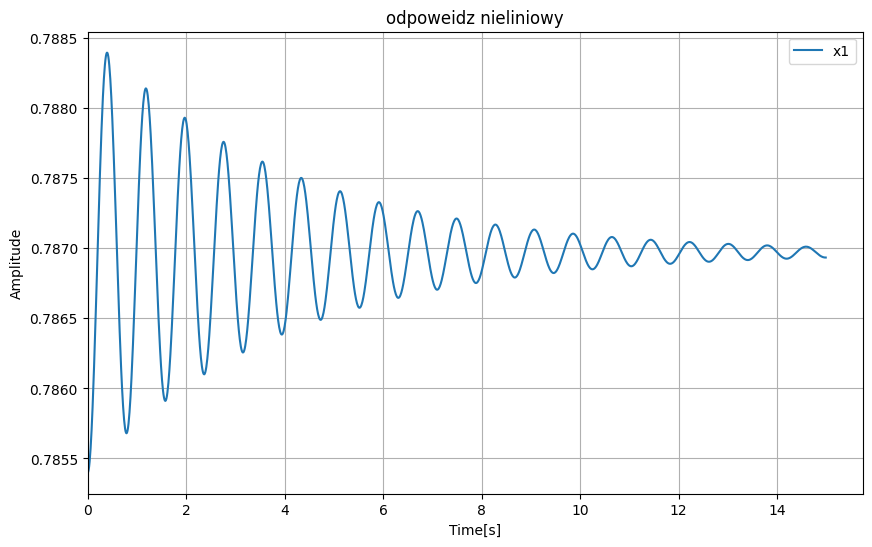

In [48]:
res_pendulum_nonlinear=odeint(nonlinear_pendulum_model,[np.pi/4,0],t,args=(0.1+45*np.sqrt(2),))

plot_sets('odpoweidz nieliniowy',[t,res_pendulum_nonlinear[:,0],'x1'])

pierwsza zmienna stanu na wspolnym wykresie 


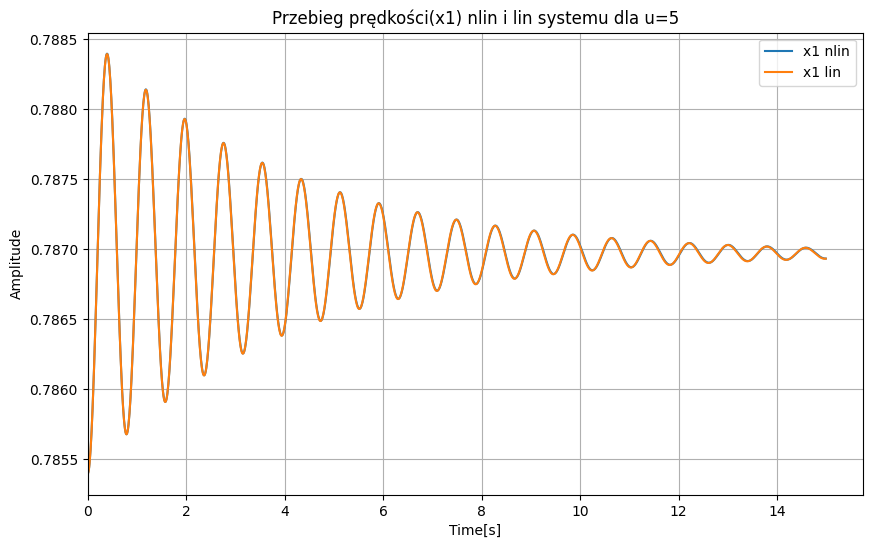

In [50]:
plot_sets("Przebieg prędkości(x1) nlin i lin systemu dla u=5",[t,res_pendulum_nonlinear[:,0],'x1 nlin'],[t_res,state1[:,0]+np.pi/4,'x1 lin'])

In [ ]:
#macierz kalmana 
print(nplin.matrix_rank(A))

k=np.hstack([B,A@B])
print(nplin.matrix_rank(k))

2
2


### SDC

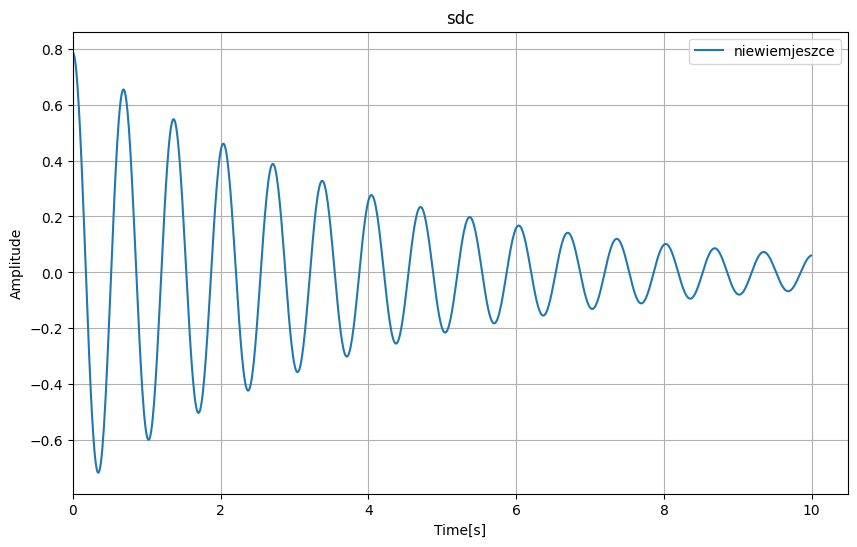

In [3]:
# Parametry układu 
m, l, J, g, d = 9.0, 1.0, 1.0, 10.0, 0.5
t_sim = np.arange(0, 10, 0.01)

x_0 = [np.pi/4, 0] # x1 = theta, x2 = theta_dot
results_sdc = [x_0]

curr_x = x_0

for i in range(len(t_sim) - 1):
    x1, x2 = curr_x
    
    if abs(x1) < 1e-6:
        a21 = -(m * g * l) / J
    else:
        a21 = -(m * g * l / J) * (np.sin(x1) / x1)
    
    A = [[0, 1],
         [a21, -d/J]]
    B = [[0], [1/J]]
    C = [[1, 0], [0, 1]]
    D = [[0], [0]]
    
    sys = signal.StateSpace(A, B, C, D)
    
    t_step = [0, 0.01]
    u_step = [0, 0] 
    
    _, _, x_out = signal.lsim(sys, U=u_step, T=t_step, X0=curr_x)
    
    curr_x = x_out[-1]
    results_sdc.append(curr_x)

results_sdc = np.array(results_sdc)

plot_sets("sdc",[t_sim,results_sdc[:,0],'niewiemjeszce'])

In [4]:
import os
from pathlib import Path

# Setup output directory
output_dir = Path(r'c:\Users\janek\Documents\ZadaniaSem5Laby\sprawka\uso\sprawko2\img')
output_dir.mkdir(parents=True, exist_ok=True)

# Figure 1: Nonlinear vs Linear for point (0,0)
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Recreate the comparison for task 1.1
t_check = np.arange(0, 15, 0.01)
A_lin = np.array([[0, 1], [-m*g*l/J, -d/J]])
B_lin = np.array([[0], [1/J]])

# Nonlinear model
def nonlin_pend(x, t, u):
    dx1 = x[1]
    dx2 = (1/J) * (u - d*x[1] - m*g*l*np.sin(x[0]))
    return [dx1, dx2]

# Linear model around (0,0)
def lin_pend(x, t, u):
    dx = A_lin @ np.array([[x[0]], [x[1]]]) + B_lin * u
    return [dx[0, 0], dx[1, 0]]

u_val = 0.1 + 45*np.sqrt(2)
res_nonlin_check = odeint(nonlin_pend, [np.pi/4, 0], t_check, args=(u_val,))
res_lin_check = odeint(lin_pend, [np.pi/4, 0], t_check, args=(u_val,))

ax1.plot(t_check, res_nonlin_check[:, 0], 'b-', label='Nonlinear', linewidth=2)
ax1.plot(t_check, res_lin_check[:, 0], 'r--', label='Linearized (0,0)', linewidth=2)
ax1.set_ylabel('x1 (θ)', fontsize=12)
ax1.set_title('Task 1.1: Linearization around (0,0)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

ax2.plot(t_check, res_nonlin_check[:, 1], 'b-', label='Nonlinear', linewidth=2)
ax2.plot(t_check, res_lin_check[:, 1], 'r--', label='Linearized (0,0)', linewidth=2)
ax2.set_xlabel('Time [s]', fontsize=12)
ax2.set_ylabel('x2 (θ_dot)', fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'lab10_fig01.png', dpi=150, bbox_inches='tight')
print("Saved: lab10_fig01.png")
plt.close()

# Figure 2: Linearization around (π/4, 0)
fig2, ax = plt.subplots(figsize=(11, 6))

A_lin2 = np.array([[0, 1], [-m*g*l/J*np.cos(np.pi/4), -d/J]])

def lin_pend2(x, t, u):
    dx = A_lin2 @ np.array([[x[0]], [x[1]]]) + B_lin * u
    return [dx[0, 0], dx[1, 0]]

u_vals = [0.1, 20, 45*np.sqrt(2), 70]
colors = ['blue', 'green', 'red', 'purple']

for u_test, color in zip(u_vals, colors):
    res_nonlin_test = odeint(nonlin_pend, [np.pi/4, 0], t_check, args=(u_test,))
    ax.plot(t_check, res_nonlin_test[:, 0], '-', color=color, label=f'u={u_test:.2f}', linewidth=2)

ax.set_xlabel('Time [s]', fontsize=12)
ax.set_ylabel('x1 (θ)', fontsize=12)
ax.set_title('Task 1.2: Nonlinear model response for different inputs', fontsize=13, fontweight='bold')
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(output_dir / 'lab10_fig02.png', dpi=150, bbox_inches='tight')
print("Saved: lab10_fig02.png")
plt.close()

# Figure 3: SDC method
fig3, ax = plt.subplots(figsize=(10, 6))

ax.plot(t_sim, results_sdc[:, 0], 'b-', linewidth=2, label='SDC Method')
ax.set_xlabel('Time [s]', fontsize=12)
ax.set_ylabel('x1 (θ)', fontsize=12)
ax.set_title('Task 1.3: Successive Discretization and Continualization (SDC)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig(output_dir / 'lab10_fig03.png', dpi=150, bbox_inches='tight')
print("Saved: lab10_fig03.png")
plt.close()

print("All lab10 figures saved successfully!")

Saved: lab10_fig01.png
Saved: lab10_fig02.png
Saved: lab10_fig03.png
All lab10 figures saved successfully!
